<a href="https://colab.research.google.com/github/sathwikmarripally/AIML-2024-2203A51118/blob/main/LAB_09_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest

1- Import Libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


In [5]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#Display the count of Credit approvals done by the company

In [9]:
print("Following is a breakup of credit approval status.\n 1 means approved credit , 0 means not approved.")
print(df['credit.policy'].value_counts())

Following is a breakup of credit approval status.
 1 means approved credit , 0 means not approved.
1    7710
0    1868
Name: credit.policy, dtype: int64


#Histogram of FICO scores by credit approval status

Text(0.5, 0, 'FICO Score')

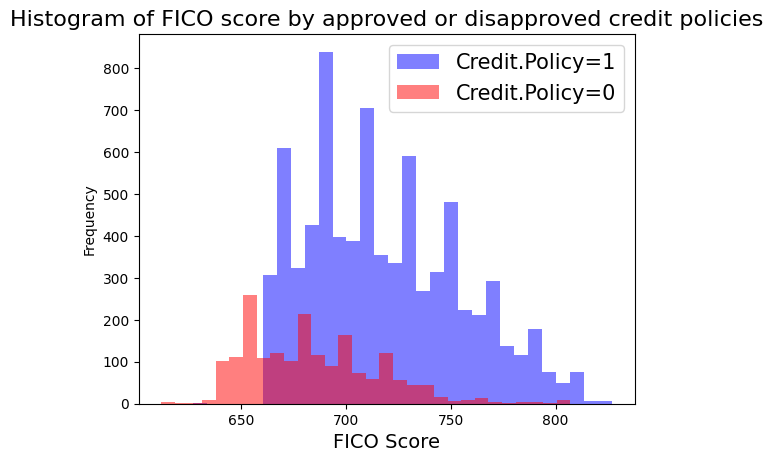

In [11]:
df[df['credit.policy']==1]['fico'].plot.hist(bins=30,alpha=0.5,color='blue',label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].plot.hist(bins=30,alpha=0.5,color='red',label='Credit.Policy=0')
plt.legend(fontsize=15)
plt.title("Histogram of FICO score by approved or disapproved credit policies",fontsize=16)
plt.xlabel("FICO Score", fontsize=14)

#Presence or absenece of statistical difference of various factors between credit approval status

Text(0, 0.5, 'Interest rate')

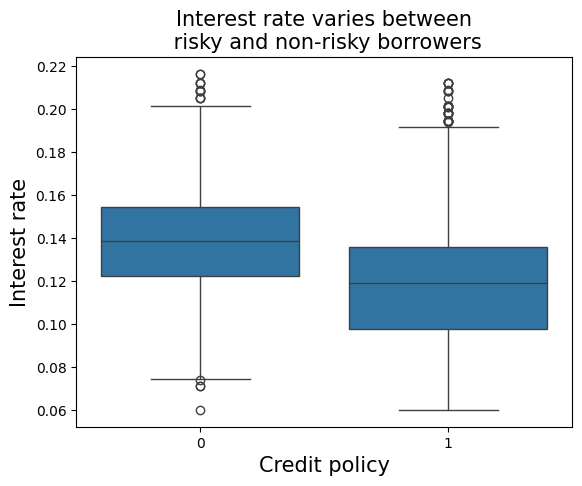

In [15]:
sns.boxplot(x=df['credit.policy'],y=df['int.rate'])
plt.title("Interest rate varies between\n risky and non-risky borrowers", fontsize=15)
plt.xlabel("Credit policy", fontsize=15)
plt.ylabel("Interest rate", fontsize=15)

#Countplot of loans by purpose, with the color hue defined by not.fully.paid

Text(0.5, 0, 'Purpose')

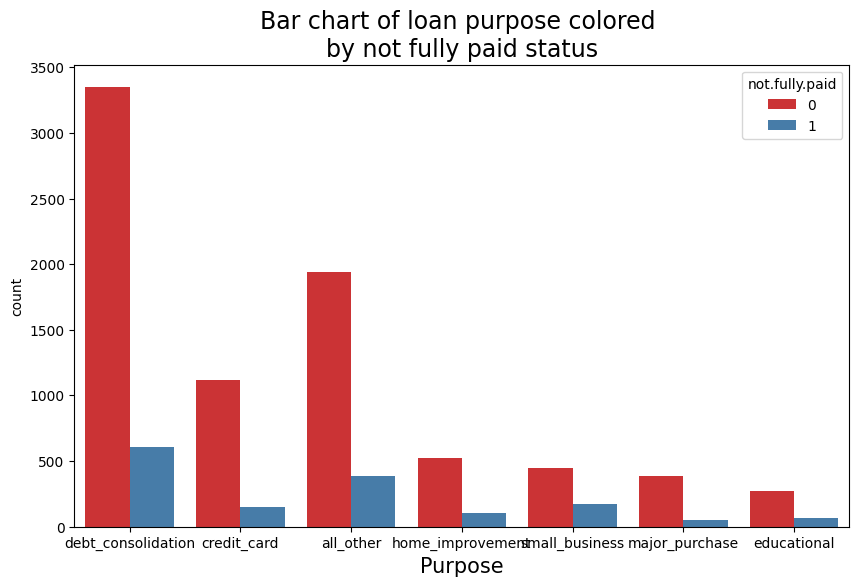

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df, palette='Set1')
plt.title("Bar chart of loan purpose colored \nby not fully paid status", fontsize=17)
plt.xlabel("Purpose", fontsize=15)

#Trend between FICO score and interest rate

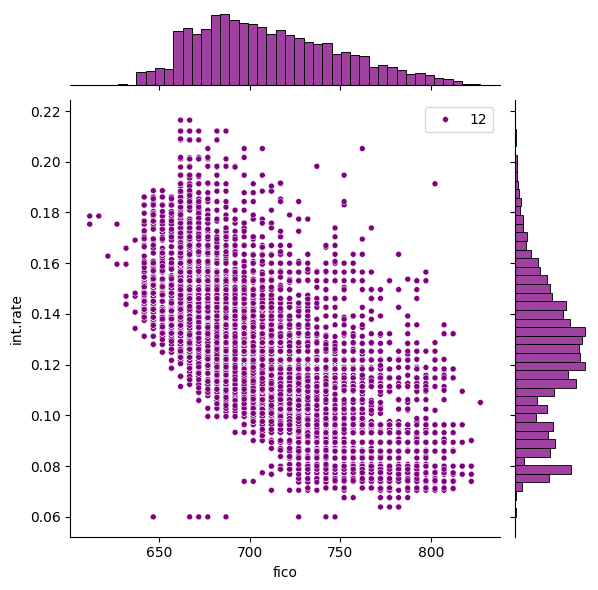

In [20]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple', size=12)

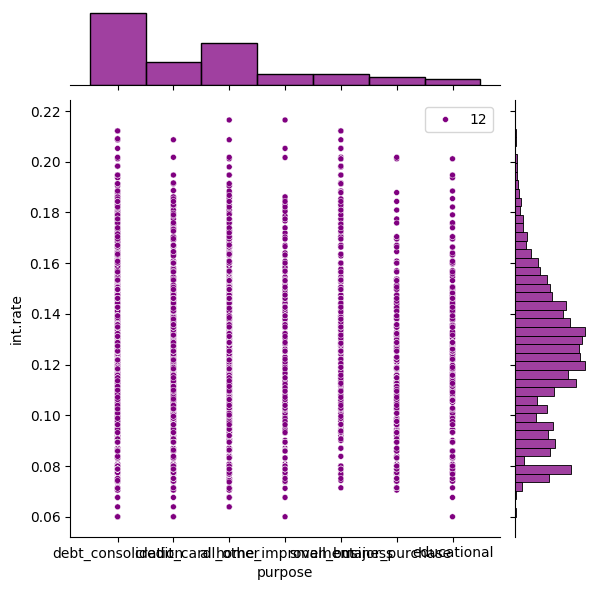

In [21]:
sns.jointplot(x='purpose',y='int.rate',data=df,color='purple', size=12)

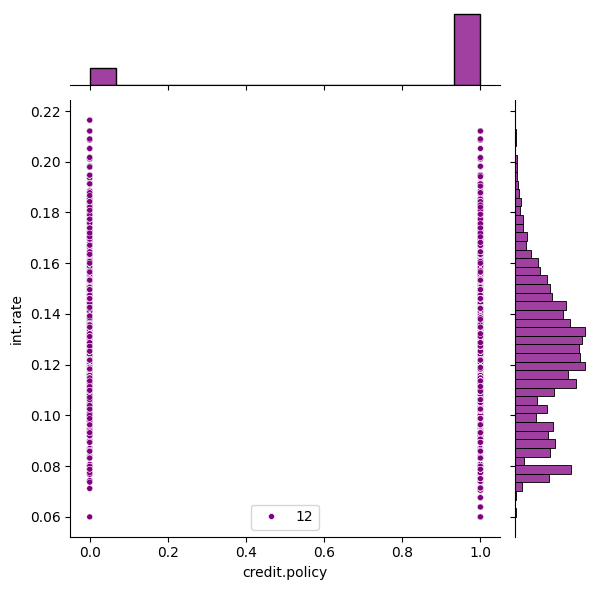

In [22]:
sns.jointplot(x='credit.policy',y='int.rate',data=df,color='purple', size=12)

#Implot to see if the trend differed between not.fully.paid and credit.policy

<Figure size 1400x700 with 0 Axes>

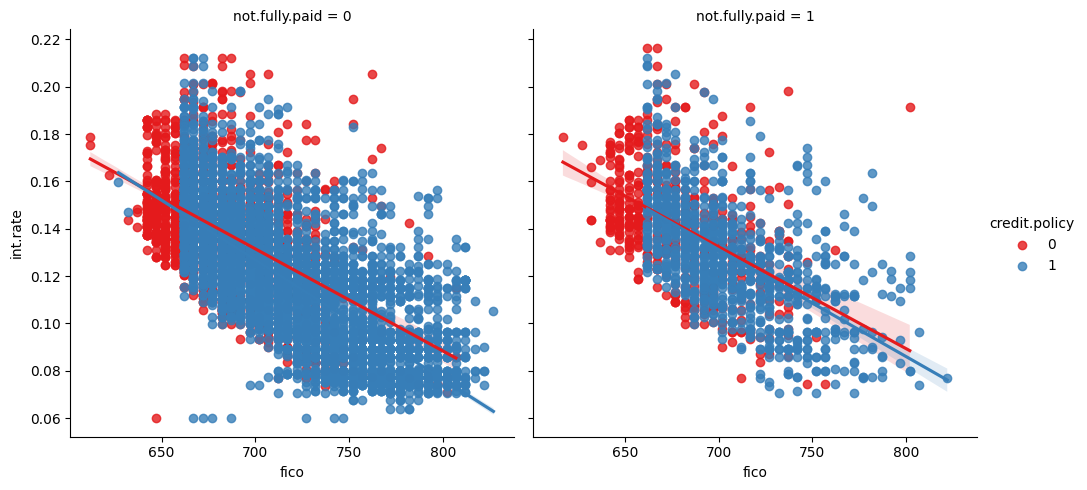

In [23]:
plt.figure(figsize=(14,7))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

#Setting up the data<br>
#Categorical features<br>
The <b>purpose</b> column as categorical. We transform them using dummy variables so sklearn will be able to understand them


In [24]:
df_final = pd.get_dummies(df,['purpose'],drop_first=True)

In [25]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


#Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [27]:
X_train.shape, y_test.shape

((6704, 18), (2874,))

#Training a Decision Tree model

In [28]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier()<br>called dtree and fit it into the training data.**

In [29]:
dtree = DecisionTreeClassifier(criterion='gini',max_depth=None)

In [30]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

#Predictions and Evaluation of Decision Tree
create predictions from the test set and create a classification report and confusion matrix

In [31]:
predictions = dtree.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2399
           1       0.22      0.22      0.22       475

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.74      0.74      2874



In [36]:
cm = confusion_matrix(y_test,predictions)
print(cm)
print("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[2020  379]
 [ 369  106]]
Accuracy of prediction: 0.74


Training

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc = RandomForestClassifier(n_estimators=600)

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

# predictions.

In [42]:
rfc_pred = rfc.predict(X_test)

In [43]:
cr = classification_report(y_test, rfc_pred)

In [44]:
print(cr)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2399
           1       0.29      0.01      0.02       475

    accuracy                           0.83      2874
   macro avg       0.56      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874

